<a href="https://colab.research.google.com/github/prateem-biswas/UK_Road_Accidents--Exploratory_Data_Analysis/blob/main/Data_Analysis_UK_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exploratory Data Analysis***

## **UK Road Accidents Dataset**

This is a dataset gathered by the UK government from the traffic data between 2000 and 2016, recording over 1.8 million accidents in the process, making this one of the most comprehensive traffic data sets.

The dataset is obtained from kaggle from the following [link](https://www.kaggle.com/datasets/devansodariya/road-accident-united-kingdom-uk-dataset) 


The aim of this project will be to perform an exploratory data anlysis on this dataset and see if we can obtain certain valuable insights.

## **Loading the Dataset**


In [1]:
# Mounting the google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download devansodariya/road-accident-united-kingdom-uk-dataset

 86% 49.0M/56.8M [00:00<00:00, 112MB/s]
100% 56.8M/56.8M [00:00<00:00, 116MB/s]


In [7]:
! unzip road-accident-united-kingdom-uk-dataset.zip

Archive:  road-accident-united-kingdom-uk-dataset.zip
  inflating: UK_Accident.csv         


## **Data Preparation and Cleaning**

1. Loading the dataset using pandas
2. Overview of the dataset 
3. Fixing the missing and incorrect values in the dataset

In [92]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
df = pd.read_csv("UK_Accident.csv")

In [94]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [95]:
df.shape

(1504150, 33)

There are more than 1.5 million rows of data along with 33 columns

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [97]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.504150e+06,1.504049e+06,1.504150e+06,1.504049e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06,1.504150e+06
mean,2.530433e+05,4.396214e+05,3.001382e+05,-1.436625e+00,5.258587e+01,3.020536e+01,2.838190e+00,1.831606e+00,1.350960e+00,4.118607e+00,3.476149e+02,4.087999e+00,1.009919e+03,3.900540e+01,2.675084e+00,3.815684e+02,1.353871e+00,2.009370e+03
std,1.489162e+05,9.511616e+04,1.610218e+05,1.398078e+00,1.512524e+00,2.551603e+01,4.018423e-01,7.147586e-01,8.253345e-01,1.924405e+00,2.594292e+02,1.428936e+00,1.823518e+03,1.413993e+01,3.205539e+00,1.302555e+03,4.783534e-01,3.013497e+00
min,0.000000e+00,6.495000e+04,0.000000e+00,-7.516225e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,1.253452e+05,3.750600e+05,1.782600e+05,-2.373902e+00,5.149009e+01,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.100000e+02,3.000000e+00,0.000000e+00,3.000000e+01,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,2.506910e+05,4.399600e+05,2.688000e+05,-1.403714e+00,5.230888e+01,3.000000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.220000e+02,4.000000e+00,1.290000e+02,3.000000e+01,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03
75%,3.760370e+05,5.230600e+05,3.981500e+05,-2.215100e-01,5.347855e+01,4.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.180000e+02,6.000000e+00,7.250000e+02,5.000000e+01,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03
max,5.700100e+05,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03


In [98]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [99]:
numeric_data = ['int64','float64']
len(df.select_dtypes(include = numeric_data).columns)

18

There are 4 datatypes in the dataset, two of which ( float64 and int64 ) are numeric. There are 18 columns that contain numeric data

### Analysing the missing values

In [100]:
df.isna().sum()

Unnamed: 0                                          0
Accident_Index                                      0
Location_Easting_OSGR                             101
Location_Northing_OSGR                              0
Longitude                                         101
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              117
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                 

**Percentage of missing values**

In [101]:
df.isna().sum().sort_values(ascending = False)

LSOA_of_Accident_Location                      108238
Time                                              117
Location_Easting_OSGR                             101
Longitude                                         101
Pedestrian_Crossing-Physical_Facilities            34
Pedestrian_Crossing-Human_Control                  17
Unnamed: 0                                          0
Light_Conditions                                    0
2nd_Road_Class                                      0
2nd_Road_Number                                     0
Road_Surface_Conditions                             0
Weather_Conditions                                  0
Speed_limit                                         0
Special_Conditions_at_Site                          0
Carriageway_Hazards                                 0
Urban_or_Rural_Area                                 0
Did_Police_Officer_Attend_Scene_of_Accident         0
Junction_Control                                    0
1st_Road_Number             

In [102]:
na_percent = (df.isna().sum().sort_values(ascending = False)/len(df))*100
na_percent

LSOA_of_Accident_Location                      7.195958
Time                                           0.007778
Location_Easting_OSGR                          0.006715
Longitude                                      0.006715
Pedestrian_Crossing-Physical_Facilities        0.002260
Pedestrian_Crossing-Human_Control              0.001130
Unnamed: 0                                     0.000000
Light_Conditions                               0.000000
2nd_Road_Class                                 0.000000
2nd_Road_Number                                0.000000
Road_Surface_Conditions                        0.000000
Weather_Conditions                             0.000000
Speed_limit                                    0.000000
Special_Conditions_at_Site                     0.000000
Carriageway_Hazards                            0.000000
Urban_or_Rural_Area                            0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000000
Junction_Control                               0

most of the columns do not contain null values. So filtering out the columns that contain null values

In [103]:
na_percent = na_percent[na_percent > 0]
na_percent

LSOA_of_Accident_Location                  7.195958
Time                                       0.007778
Location_Easting_OSGR                      0.006715
Longitude                                  0.006715
Pedestrian_Crossing-Physical_Facilities    0.002260
Pedestrian_Crossing-Human_Control          0.001130
dtype: float64

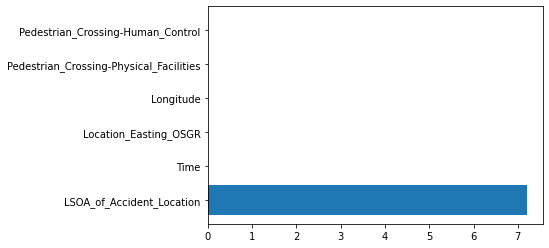

In [104]:
na_percent.plot(kind = "barh", width = 0.9)

There are 6 columns that contains null values. Compared to all the columns, only the Accident_location column has a lot of missing rows (~7%). The other columns with missing data do not even register on the graph.

As NULL values are less as compared to size of whole data
so, it is ideal to fill the null values with logically identified values from each feature.

In [105]:
df['Pedestrian_Crossing-Human_Control'].value_counts()

None within 50 metres                 1495269
Control by other authorised person       5220
Control by school crossing patrol        3644
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [107]:
df["LSOA_of_Accident_Location"]

0          E01002849
1          E01002909
2          E01002857
3          E01002840
4          E01002863
             ...    
1504145          NaN
1504146          NaN
1504147          NaN
1504148          NaN
1504149          NaN
Name: LSOA_of_Accident_Location, Length: 1504150, dtype: object

Let us have a look at the corresponding values of latitude, where the longitude values are null :

In [173]:
lat = df['Latitude'][df['Longitude'].isna()]
lat.unique()


array([0.])

In [177]:
df['Latitude'][df['Latitude'] == 0].count()

101

There are 101 null values in the Longitude column, and all the values of their corresponding Latitude column are 0. Moreover only these 101 columns have zero values in the latitude column. 
This means the corresponding latitude values are also faulty !

In order to fix this we will replace the null values of longitude and their corresponding latitude columns with their mean.

In [178]:
df['Latitude'].replace(to_replace = 0, value = df['Latitude'].mean(), inplace = True )
df['Longitude'].fillna(value = df['Longitude'].mean(), inplace = True)

Managing other null values

In [155]:
df['Pedestrian_Crossing-Human_Control'].fillna(value = 'Unknown' , inplace = True)
df['Pedestrian_Crossing-Physical_Facilities'].fillna(value = 'Unknown' , inplace = True)
df['Location_Easting_OSGR'].fillna(value = 0, inplace = True)
df["LSOA_of_Accident_Location"].fillna(value = 'Unknown', inplace = True)

In [109]:
df[["Date","Time"]].head(3)

,Date,Time
0,04/01/2005,17:42
1,05/01/2005,17:36
2,06/01/2005,00:15


In [110]:
df.dtypes[['Time', 'Date']]

Time    object
Date    object
dtype: object

## **Exploratory Analysis and Visualization**

### **Columns to analyse**
1. Day_of_week
2. Year
3. Time
4. Number_of_Casualties 
5. Accident_Severity
6. Weather_conditions
7. Light_conditions


### **Questions to Ponder**


1. What is the trend for number of accidents per year ?
2. Which time of the day do most accidents occur?
3. What is the distribution of accidents through the various days of the week ?
4. Breakup of the severity of accidents and the casualities per severity level
5. Importance of Light and Weather conditions in predicting accident severity


### **1. Visualization of the Accident Density throughout UK**

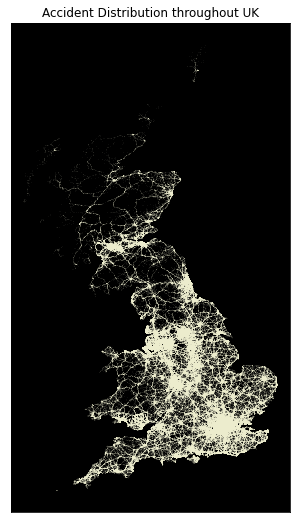

In [ ]:
plt.figure(figsize=(5,9))
plt.axes().set_facecolor("black")
plt.scatter(x = df["Longitude"], y = df["Latitude"],s=0.01, alpha= 0.2, color="lightyellow")
plt.title("Accident Distribution throughout UK")

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()


Plotting the accidents does give us the shape resembling that of UK ! <br>
The accident density, as expected seem to be scattered non- uniformly with certain regions with higher density (brighter areas in the map). The points also seem to represent the network of roads throughout UK !

**Intuition :** The areas of high accident density might acctually represent the urban areas and large cities ! 

Lets plot the top populated cities of UK on top of this distribution

In [ ]:
city = pd.read_csv('uk_top_cities.csv')
city

,City,Population,Latitude,Longitude
0,London,"8,961,989",51.509865,-0.118092
1,Birmingham,"984,333",52.489471,-1.898575
2,Liverpool,"864,122",53.400002,-2.983333
3,Sheffield,"685,368",53.383331,-1.466667
4,Bristol,"617,280",51.454514,-2.587910
5,Glasgow,"591,620",55.860916,-4.251433
6,Leicester,"508,916",52.633331,-1.133333
7,Edinburgh,"464,990",55.953251,-3.188267
8,Leeds,"455,123",53.801277,-1.548567
9,Cardiff,"447,287",51.481583,-3.179090


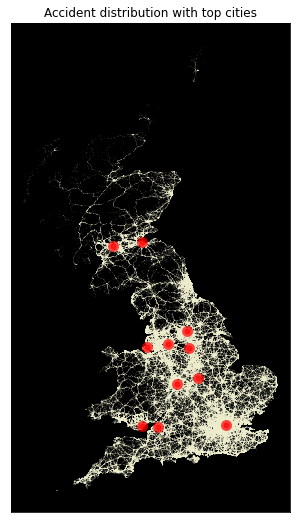

In [ ]:
plt.figure(figsize=(5,9))
plt.axes().set_facecolor("black")
plt.scatter(x = df["Longitude"], y = df["Latitude"],s=0.01, alpha= 0.2, color="lightyellow")

plt.scatter(x = city.Longitude, y = city.Latitude,  alpha = 0.7, linewidth = 5 , c = "r" )
plt.title("Accident distribution with top cities")

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

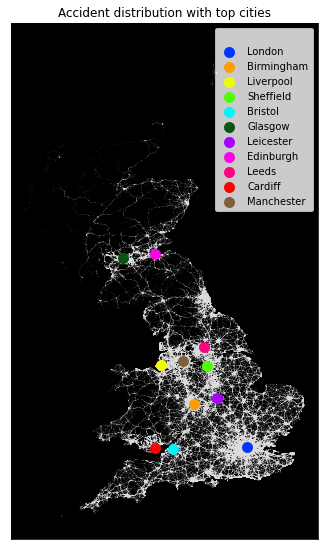

In [ ]:
plt.figure(figsize=(5.5,9.5))
plt.axes().set_facecolor("black")
plt.scatter(x = df["Longitude"], y = df["Latitude"], s=0.01, alpha= 0.1, color="white")

color = ["#0335fc", "#fc9d03", "#f0fc03", "#4efc03", "#03f4fc", "#0a5414",
         "#a203ff", "#fc03e7", "#fc0380", "#fc0303", "#805d3b" ]
for i in range(0,len(city)):
  plt.scatter(x = city["Longitude"].loc[i], y = city["Latitude"].loc[i], linewidth = 5, color = color[i], zorder = 1 )

plt.legend([""] + list(city.City))
plt.title("Accident distribution with top cities")

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

#### **insights**

It definitely seems like that most accidents are clustered around the large, populated cities, as is expected ! A large population of people live in and around the cities and commute to work daily . This definitely increases the likelihood of an accident to occur in these areas !
If we can plot more cities in the map, maybe it will cover the other dense accident prone areas !

(**Q :** find a way to plot a heatmap for even better visualization)

### **2. Accident trends per year**

In [111]:
df["Year"].unique()

array([2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014])

In [112]:
yearly_acc = df["Year"].value_counts().sort_index()
yearly_acc

2005    198735
2006    189161
2007    182115
2009    163554
2010    154414
2011    151474
2012    179715
2013    138660
2014    146322
Name: Year, dtype: int64

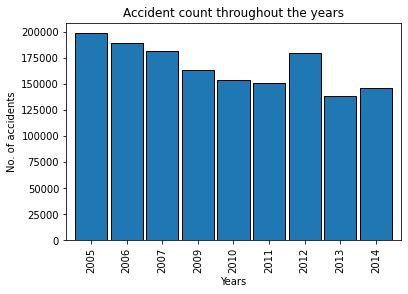

In [113]:
yearly_acc.plot(kind='bar', width = 0.9, edgecolor = "black")
plt.title("Accident count throughout the years")
plt.xlabel("Years")
plt.ylabel("No. of accidents")
plt.show()

In [114]:
casualty_per_year = df.groupby("Year")['Number_of_Casualties'].sum().sort_index()
casualty_per_year

Year
2005    271017
2006    258404
2007    247780
2009    222146
2010    208648
2011    203950
2012    241954
2013    183670
2014    194477
Name: Number_of_Casualties, dtype: int64

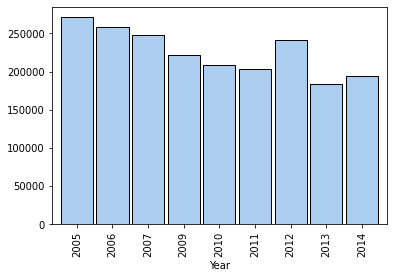

In [115]:
casualty_per_year.plot(kind = "bar", width = 0.9, color = "#abcdef" , edgecolor = "black", xlabel = 'Year' )
plt.show()

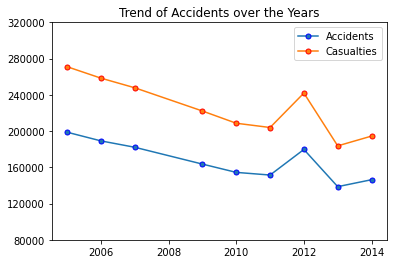

In [116]:
yticks = np.arange(80000, 360000, 40000 )

plt.plot(yearly_acc.index.values,yearly_acc, marker = ".", label = "Accidents", markersize = 10, markeredgecolor = "blue")
plt.plot(casualty_per_year.index.values,casualty_per_year, label = "Casualties", marker = ".", markersize = 10, markeredgecolor = "red")
plt.yticks(yticks)


plt.title("Trend of Accidents over the Years")
plt.legend()
plt.show()

#### **Insights :**

There seems to be a trend that the total number of accidents have been reducing per year, with 2012 being a major exception. the dataset does not contain data from the year 2008. However, looking at the steady decrease in numbers between 2005 and 2011 and a sharper decrease between 2007 and 2009, it can be predicted that the value for 2008 would be somewhere between that of 2007 and 2009.

The total number of casualties per year follows the same trend as that of the total number of accidents.

 **Note :** What does casualty refer here ?
It is important to understand whether casualty here only refers to the number of deaths in an accident or it also includes the number of people involved/ injured in the accident ? 

In [117]:
0 in df["Number_of_Casualties"].unique()

False

There is a very low chance that there will be no accidents where the number of deaths will be 0, specially in a minor accident. So the Number_of_Casuality column does describe the total number of people involved in the accident.



### **3. Accident Distribution throughout the day**

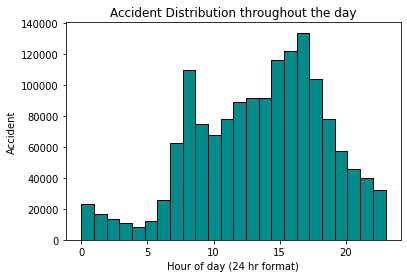

In [224]:
day = plt.hist(pd.to_datetime(df["Time"], format = "%H:%M").dt.hour, bins = 24, color = "darkcyan", edgecolor ="black")
plt.title("Accident Distribution throughout the day")
plt.xlabel("Hour of day (24 hr format)")
plt.ylabel("Accident")
plt.show()

#### **Insights**
1. The number of accidents are very little between midnight (12 am) and early morning (6 am), with least being at 4 am
2. A large number of accidents occur during the 7 am and 2 pm while, peaking at around 8 am ( **this may coincide with the morning rush to go to work** ).
3. Between 12pm to 2 pm, the rate of accident remains high but constant
4. The time between 3 and 7 pm accounts for the highest cases of accidents, with the time between 4pm and 5pm accounting for the most number of accidents throughout the day ( **maybe this is correlated with the fact that people return from office, making it the rush hour** )
5. The total cases of accidents continues to decrease from around 7-8 pm


* From one of the article : [What time is the rush hour in UK](https://gotthisnow.com/what-time-is-rush-hour-in-uk), we get this extract : **Rush hour may be 6–10 am (6:00–10:00) and 3–7 pm (15:00–19:00). Peak traffic periods may vary from city to city, from region to region, and seasonally.** If the information is valid, the distribution of accidents correlates nicely with the traffic condition throughout the day.

### **4. Distribution throughout various days of the week**

In [121]:
df["Day_of_Week"].value_counts()

6    247137
5    226411
4    226359
3    224110
2    213748
7    201413
1    164972
Name: Day_of_Week, dtype: int64

In [122]:
acc_day =df[["Day_of_Week","Number_of_Casualties"]].groupby("Day_of_Week").sum()

**Analysing which day the various number of the day corresponds to**

we are not certain whether day number 1 refers to sunday, monday or any other day of the week. so geeting the day of the week from the date column will help in clarifying that. 

In [123]:
 dates = pd.Series(pd.to_datetime(df["Date"], format = "%d/%m/%Y"))
dates.dt.day_name()[:5]

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4       Monday
Name: Date, dtype: object

In [124]:
df["Day_of_Week"][:5]

0    3
1    4
2    5
3    6
4    2
Name: Day_of_Week, dtype: int64

In [125]:
dict = {"Day_Number" : df["Day_of_Week"][:5], "Day_of_Week" : dates.dt.day_name()[:5]}
day_n = pd.DataFrame(dict)
day_n

,Day_Number,Day_of_Week
0,3,Tuesday
1,4,Wednesday
2,5,Thursday
3,6,Friday
4,2,Monday


We conclude that 1 refers to Sunday, 2 to Monday, and so on.

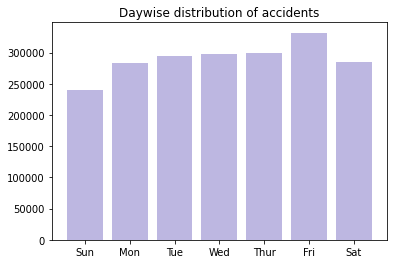

In [126]:
day = ["Sun","Mon","Tue","Wed", "Thur","Fri","Sat"]
plt.bar(acc_day.index.values, acc_day.iloc[:,0], color = "#7d70c4", alpha = 0.5,) #problem with the converted dataset...
plt.xticks(acc_day.index.values, day)
xlabel = "Day of Week"
ylabel = "Total Casualties"
plt.title("Daywise distribution of accidents")

plt.show()

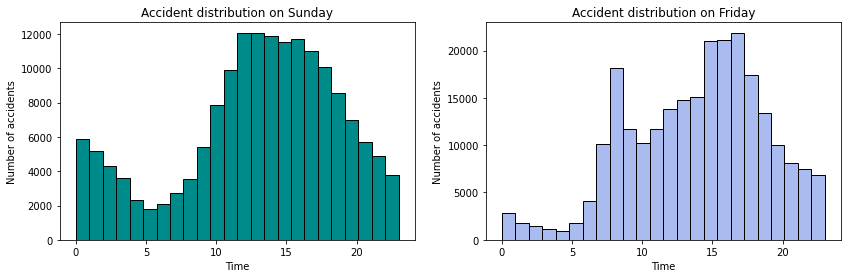

In [228]:
plt.figure(figsize = (14,4))
# First Plot 
plt.subplot(1,2,1)
sun = df[df["Day_of_Week"]== 1]
plt.hist(pd.to_datetime(sun["Time"], format = "%H:%M").dt.hour, bins = 24, color = "darkcyan", edgecolor ="black")
plt.xlabel("Time")
plt.ylabel("Number of accidents")
plt.title("Accident distribution on Sunday")

#second plot
plt.subplot(1,2,2)
mon = df[df["Day_of_Week"]== 6]
plt.hist(pd.to_datetime(mon["Time"], format = "%H:%M").dt.hour, bins = 24, color = "#aabcef", edgecolor ="black")
plt.title("Accident distribution on Friday")
plt.xlabel("Time") 
plt.ylabel("Number of accidents")
plt.show()

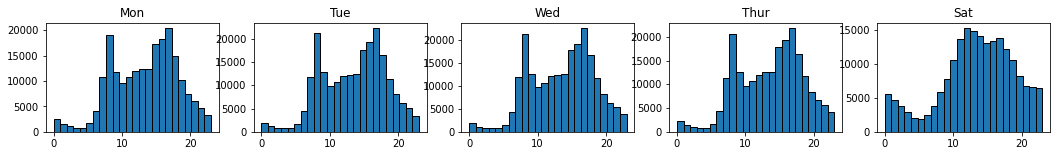

In [128]:
# For other days of the week 
plt.figure(figsize = (18,2))
j = 0 
for i in [2,3,4,5,7]:
  j+=1
  plt.subplot(1,5,j)
  plt.hist(pd.to_datetime(df[df["Day_of_Week"]== i]["Time"], format = "%H:%M").dt.hour, bins = 24, edgecolor ="black")
  plt.title(day[i-1])
plt.show()

####**Insights**

1. The total cases of accidients seems to be distributed equally among the weekdays, with the weekends having comparitively lower cases. Sunday has the least number of accidents while Friday has maximum cases.

2. There is big difference in the distribution of accidents in weekdays and weekends. On weekends, the distribution resembles a normal distribution with the peak around 3pm. Incase of weekdays however it seems to resemble the overlap  of 2 normal distribution curves, each contributed to the rush hour in traffic during workdays.

### **5. Severity of Accidents**

In [129]:
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [130]:
df.Accident_Severity.unique()

array([2, 3, 1])

In [131]:
severity = df.Accident_Severity.value_counts().sort_index() # Total number of accidents per severity level

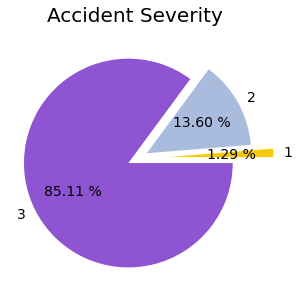

In [132]:
plt.figure(figsize = (6.4,4.8))
color = ["#f7ca00","#aabcde","#8e54d1"]
explode = [0.3,0.1,0.1]
plt.pie(severity, labels = severity.index.values, autopct = "%.2f %%", pctdistance = 0.6, colors = color, explode = explode, textprops={'fontsize': 14})
plt.title("Accident Severity ", fontdict ={'fontsize': 20})
plt.show()

In [133]:
# Maximum Casualities in a single case :

print("Maximum Casuality in an Accident :", df["Number_of_Casualties"].max())

Maximum Casuality in an Accident : 93


In [134]:
cas_per_sev = df["Number_of_Casualties"].groupby(df["Accident_Severity"]).sum().sort_index() # Total no of Casualties per Severity level
cas_per_sev

Accident_Severity
1      36683
2     297115
3    1698248
Name: Number_of_Casualties, dtype: int64

In [135]:
cas_per_sev.divide(severity) # Number of casualties per accident per level (no of casualties/ no of accidents)

Accident_Severity
1    1.886889
2    1.452857
3    1.326544
dtype: float64

**Note**

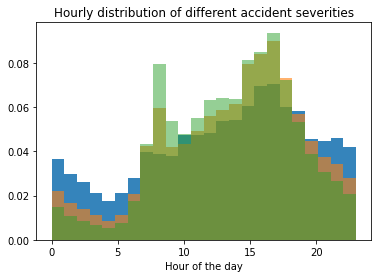

In [233]:
sev1 = df[df["Accident_Severity"] == 1]
sev2 = df[df["Accident_Severity"] == 2]
sev3 = df[df["Accident_Severity"] == 3]

plt.hist(pd.to_datetime(sev1["Time"], format = "%H:%M").dt.hour, bins = 24, density = True, alpha = 0.9)

plt.hist(pd.to_datetime(sev2["Time"], format = "%H:%M").dt.hour, bins = 24, density = True, alpha = 0.6)

plt.hist(pd.to_datetime(sev3["Time"], format = "%H:%M").dt.hour, bins = 24, density = True, alpha = 0.5)

plt.title("Hourly distribution of different accident severities")
plt.xlabel("Hour of the day")
plt.show()

More than 80% of the accidents seem to be very severe (level = 3), while minor accidents (level = 1) account for only around 1 %. 

#### **Insights**

1. More than 80% of the accidents seem to be very severe (level = 3), while minor accidents (level = 1) account for only around 1 %.

2. The distribution for level 1 resembles a normal distribution like that obtained during weekends , while levels 2 and 3 resembles the double humped distribution obtained from working days .

**Note : Is there any connection between day of week and accident severity ?**

In [137]:
sev1.Day_of_Week.value_counts().sort_index()

1    3080
2    2530
3    2514
4    2431
5    2562
6    2952
7    3372
Name: Day_of_Week, dtype: int64

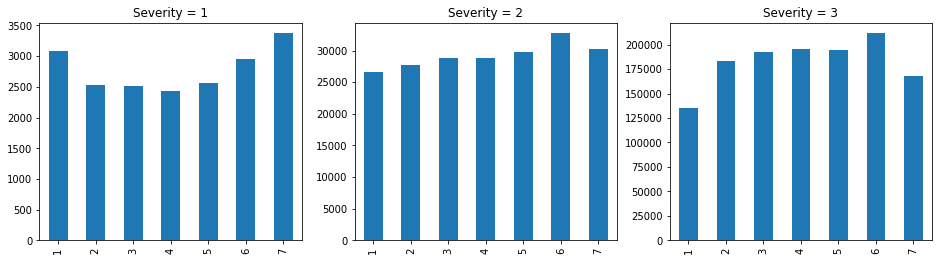

In [138]:
plt.figure(figsize =(16,4))

plt.subplot(1,3,1)
sev1.Day_of_Week.value_counts().sort_index().plot(kind = "bar")
plt.title("Severity = 1")

plt.subplot(1,3,2)
sev2.Day_of_Week.value_counts().sort_index().plot(kind = "bar")
plt.title("Severity = 2")

plt.subplot(1,3,3)
sev3.Day_of_Week.value_counts().sort_index().plot(kind = "bar")
plt.title("Severity = 3")

plt.show()

#### **Insights (ii)**

* For all the accidents that are categorized to level 1, the weekends seem to have relatively higher number of cases as compared to the weekdays.

* for level 2, the distribution among weekdays is fairly equal.

* for level 3 the distribution is opposite to that of level 1, ie, the weekdays have a much higher count as opposed to the weekends.
* In all the cases Friday always seem to have a higher no. of accidents as compared to the other weekdays. 

### **6. Importance of Light and Weather conditions in predicting accident severity**

In [139]:
accident_severity = pd.DataFrame({ 'Light_Conditions' : df.Light_Conditions, 'Weather_Conditions' : df.Weather_Conditions, 'Accident_Severity' : df.Accident_Severity })

accident_severity.sample(5)


,Light_Conditions,Weather_Conditions,Accident_Severity
1192670,Daylight: Street light present,Fine without high winds,2
510029,Daylight: Street light present,Fine without high winds,3
1221736,Darkness: Street lights present and lit,Fine without high winds,2
277840,Darkness: Street lights present and lit,Fine without high winds,3
965667,Daylight: Street light present,Other,3


In [140]:
accident_severity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Light_Conditions    1504150 non-null  object
 1   Weather_Conditions  1504150 non-null  object
 2   Accident_Severity   1504150 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 34.4+ MB


**Converting Object data-type into Category datatype**

In [141]:
for object_feature in accident_severity.dtypes[accident_severity.dtypes == 'object'].index :
     accident_severity[object_feature] = accident_severity[object_feature].astype('category')

In [142]:
accident_severity.dtypes

Light_Conditions      category
Weather_Conditions    category
Accident_Severity        int64
dtype: object

**Distruibution of accidents on various light and weather conditions :**

In [143]:
accident_severity['Weather_Conditions'].value_counts()

Fine without high winds       1203943
Raining without high winds     177663
Other                           33503
Unknown                         28422
Raining with high winds         20813
Fine with high winds            18355
Snowing without high winds      11301
Fog or mist                      8190
Snowing with high winds          1960
Name: Weather_Conditions, dtype: int64

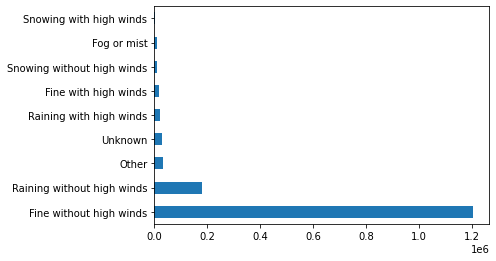

In [144]:
accident_severity['Weather_Conditions'].value_counts().plot(kind = 'barh')
plt.show()

In [145]:
accident_severity['Light_Conditions'].value_counts()

Daylight: Street light present               1102222
Darkness: Street lights present and lit       296340
Darkeness: No street lighting                  82559
Darkness: Street lighting unknown              16120
Darkness: Street lights present but unlit       6909
Name: Light_Conditions, dtype: int64

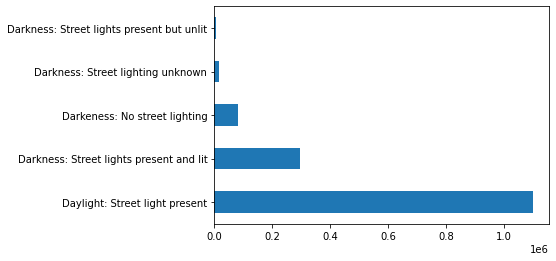

In [146]:
accident_severity['Light_Conditions'].value_counts().plot(kind = 'barh')
plt.show()

**Note :** There is exponetial distribution in both the columns of Weather and Light Conditions, with one categorical variable in each column making up more than one third of the data. 

**Building a Correlation matrix**

In [147]:
accident_severity = pd.get_dummies(data=accident_severity, columns=['Light_Conditions', 'Weather_Conditions'])

In [148]:
accident_severity.head(2)

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [149]:
corr_chart = accident_severity.corr().loc['Accident_Severity':]
corr_chart = pd.DataFrame(corr_chart)
corr_chart

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
Accident_Severity,1.000000,-0.071174,0.002657,-0.018362,-0.003769,0.053096,-0.005982,-0.025910,-0.004042,0.012961,0.000549,0.018437,0.003080,0.010913,0.017108
Light_Conditions_Darkeness: No street lighting,-0.071174,1.000000,-0.025083,-0.119369,-0.016370,-0.399076,0.018572,-0.074911,0.058249,0.037683,0.048193,0.033486,0.028193,0.031123,-0.015329
Light_Conditions_Darkness: Street lighting unknown,0.002657,-0.025083,1.000000,-0.051555,-0.007070,-0.172360,-0.002335,-0.044742,0.005986,0.002229,0.000384,-0.006382,0.000715,0.003057,0.140243
Light_Conditions_Darkness: Street lights present and lit,-0.018362,-0.119369,-0.051555,1.000000,-0.033648,-0.820269,0.006970,-0.093839,0.011799,0.031787,0.041990,0.081967,0.001151,0.016986,-0.012381
Light_Conditions_Darkness: Street lights present but unlit,-0.003769,-0.016370,-0.007070,-0.033648,1.000000,-0.112492,0.003017,-0.018033,0.005796,0.008136,0.010302,0.012519,0.002725,0.001946,-0.001917
Light_Conditions_Daylight: Street light present,0.053096,-0.399076,-0.172360,-0.820269,-0.112492,1.000000,-0.015741,0.136071,-0.042865,-0.049729,-0.064212,-0.091339,-0.016129,-0.032296,-0.013322
Weather_Conditions_Fine with high winds,-0.005982,0.018572,-0.002335,0.006970,0.003017,-0.015741,1.000000,-0.222582,-0.008224,-0.016776,-0.013166,-0.040677,-0.004015,-0.009670,-0.015425
Weather_Conditions_Fine without high winds,-0.025910,-0.074911,-0.044742,-0.093839,-0.018033,0.136071,-0.222582,1.000000,-0.148175,-0.302260,-0.237214,-0.732891,-0.072337,-0.174238,-0.277918
Weather_Conditions_Fog or mist,-0.004042,0.058249,0.005986,0.011799,0.005796,-0.042865,-0.008224,-0.148175,1.000000,-0.011168,-0.008765,-0.027079,-0.002673,-0.006438,-0.010268
Weather_Conditions_Other,0.012961,0.037683,0.002229,0.031787,0.008136,-0.049729,-0.016776,-0.302260,-0.011168,1.000000,-0.017879,-0.055238,-0.005452,-0.013132,-0.020947


In [150]:
# Using Seaborn for plotting a Heatmap :
import seaborn as sns

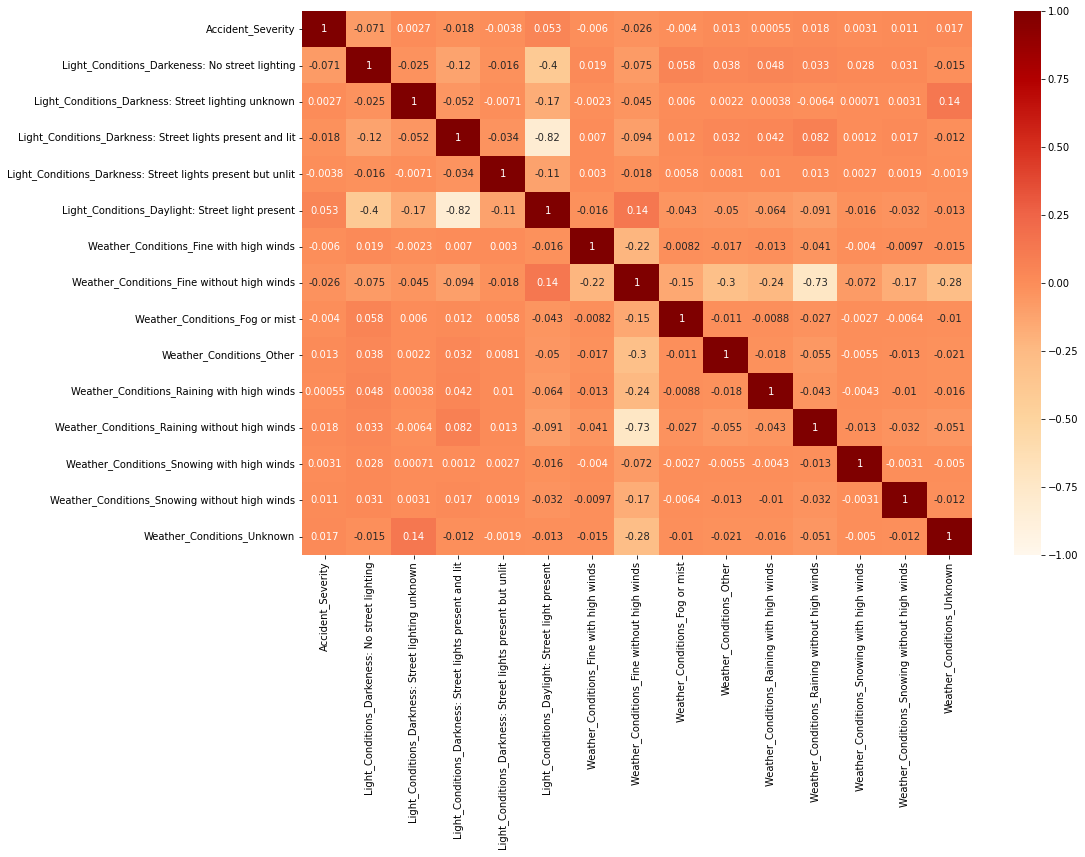

In [151]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_chart, vmin=-1, cmap='OrRd', annot = True)
plt.show()

#### **Insights**

Our general intuition says that the number of accidents will be more when the light and weather conditions are at bad, like absence of ambient light at night-time or bad weather conditions like too much winds, rainfall. From the correlation matrix of the data however, we can observe that overall both the light and weather conditions doesn't have much effect on Accident_severity as they are almost close to 0.

Light_conditions with Street Light present is more impactful compared to Weather_Conditions. The interpretation of this could be like when Street Light is present compared Daytime, the number of accidents being caused and their severity are much higher.

However this is not much insightful and we can conclude from the given data that light and weather conditions don't play a big role in the accident severity.

## **Conclusion :**

we can summarize our findings as follows :


* Most of the accidents are packed in and around the major cities in UK. Also. a majority of  the accidents seem to have occured in the sounthern part of the island !
* The number of traffic accidents in UK shows a decreasing trend over the years.
* During the week days the number of accidents increase to maximum corresponding to the rush hour peaks. Therefore the timings when people are going and coming back from their jobs leads to higher traffic and higher accident rates. The number of accidents in weekends are comparitively less.
* More 80% accidents are of level 3 while only around 1 % of accidents are of  level 1. However, the average casuality count per level is just the opposite, ie, level 1 has the average casuality count, while 3 has the lowest. Weekends have a higher distribution of level 1 accidents, while level 3 has higher distribution in weekdays.
* Contrary to our general intuition, there is very little correlation between the Light and Weather conditions, and the accident severity.